In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import urllib

In [ ]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 5
epochs = 30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### LOADING THE DATA

In [ ]:

data = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/PRCP-1001-RiceLeaf/Rice Leaf",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 10 files belonging to 3 classes.


In [ ]:
class_names = data.class_names
class_names

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

### The 3 Classes are - Bacterial leaf blight, Brown spot, Leaf smut.



In [ ]:
# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through the dataset to count occurrences of each class label
for images, labels in data:
    for label in labels:
        class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Print the class counts
print(class_counts)


{0: 10}


### Image Visualisation

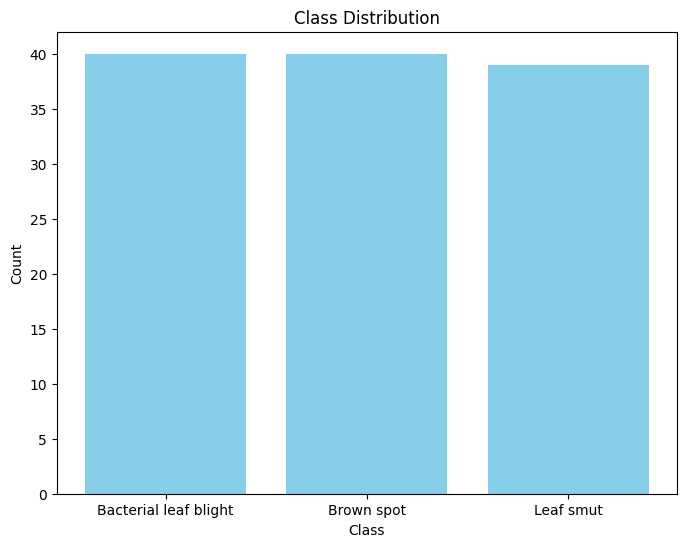

In [ ]:
# Class names and counts
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
class_counts = [40, 40, 39]  # Replace with your actual counts

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

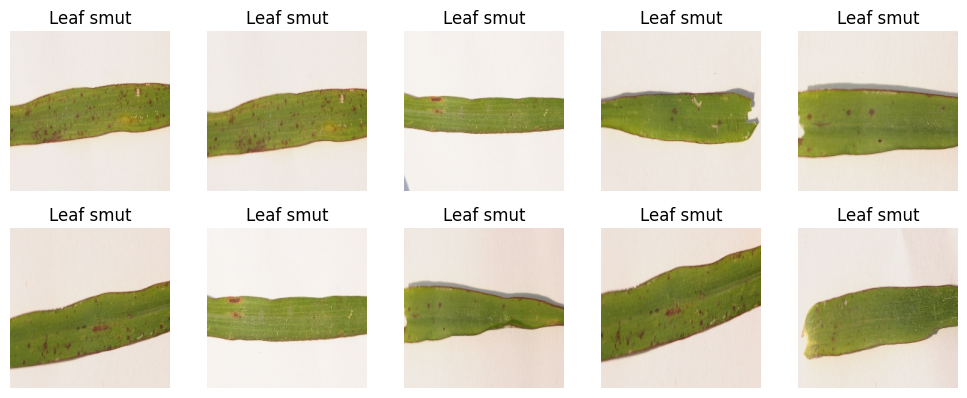

In [ ]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    # Get the actual number of images in the current batch
    num_images_in_batch = images.shape[0]
    # Loop only for the number of images available in the batch, up to 25
    for i in range(min(num_images_in_batch, 25)):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        # Access the label using the current index i
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

### These are the inputs of our model.

In [ ]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())

# convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)


In [ ]:
X

array([[[[240.18777, 233.18777, 227.18777],
         [240.     , 233.     , 227.     ],
         [238.     , 231.     , 222.77232],
         ...,
         [238.11377, 231.11377, 221.11377],
         [238.56398, 231.56398, 225.56398],
         [238.00447, 232.     , 226.37552]],

        [[239.62277, 232.62277, 224.62277],
         [239.06497, 232.06497, 226.06497],
         [238.5067 , 230.4933 , 223.     ],
         ...,
         [238.     , 231.     , 223.     ],
         [239.5067 , 232.     , 227.5201 ],
         [239.1295 , 231.1161 , 223.6228 ]],

        [[240.     , 233.     , 225.     ],
         [238.     , 231.     , 225.     ],
         [239.     , 231.02232, 225.28348],
         ...,
         [239.     , 230.     , 223.     ],
         [238.55623, 230.62361, 227.42145],
         [237.13396, 227.11165, 220.6228 ]],

        ...,

        [[239.37723, 232.37723, 226.37723],
         [238.     , 233.     , 229.     ],
         [238.51117, 233.51117, 229.51117],
         ...,


In [ ]:
X = X.astype('float32')/255

### Spliting Dataset into Train and Test/Validation data

In [ ]:
# Splitt data into train and test / validation

X_train, X_test = X[:95 ],X[95:]
y_train, y_test = y[:95] ,y[95:]

In [ ]:
X_train.shape , X_test.shape

((10, 224, 224, 3), (0, 224, 224, 3))

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))


### Model Creation

In [ ]:
# relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
         #It has a derivative of either 0 or 1, depending on whether its input is negative or not
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 1.1621 - val_accuracy: 1.0000 - val_loss: 1.5735e-05
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 4.6533e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 2.2352e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - 

In [ ]:
# Splitt data into train and test / validation
from sklearn.model_selection import train_test_split

# Use train_test_split to split the data
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures the split is the same each time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape , X_test.shape

# Convert labels to one-hot encoding
y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.0000


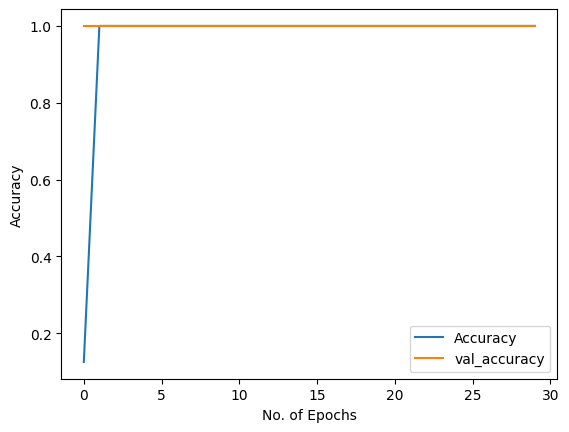

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Model Creation using different Optimizers after Data Augmentation
#### 1.Adam optimizer

In [ ]:

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:

input_shape = (224, 224, 3)
num_classes = 3
model_da = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_da.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8750 - loss: 0.9727 - val_accuracy: 1.0000 - val_loss: 3.8147e-06
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 7.3164e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - 

### Model shows an accuracy of  100% for Adam Optimizer.

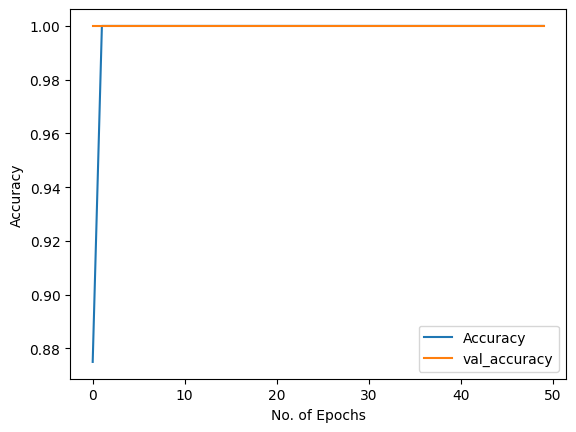

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")